test 1 : fonction read_full_spectra_centroid avant modification des bins.
    read_chromato_and_chromato_cube : lance la fonction read_chroma + read_full_spctra_centroid
    => chromato_cube
    utilisation de chromato_cube avec peak detection mode 3D et methode "peak_local_max"

In [ ]:
import os, sys
path_to_scr_folder=os.path.join(os.path.dirname(os.path.abspath('')), 'src')
sys.path.append(path_to_scr_folder)



In [11]:
import read_chroma
import mass_spec
from peak_detection import peak_detection
import numpy as np
import projection
import plot

In [12]:




# read_chroma.read_chroma('/media/camille/DATA1/cdf centroid/A-F-028-817822-droite-ReCIVA.cdf')
chromato, time_rn, chromato_cube, sigma, mass_range = read_chroma.read_chromato_and_chromato_cube('/media/camille/DATA1/cdf centroid/A-F-028-817822-droite-ReCIVA.cdf')


chromato read 8.091223239898682 s
--- 106.53509616851807 seconds --- to compute full spectra centroid
full spectra computed 108.01046442985535 s
baseline corrected


In [16]:
seuil=5
MIN_SEUIL = seuil * sigma * 100 / np.max(chromato)
# detect peaks
# threshold_abs = 0
coordinates = peak_detection((chromato, time_rn, None), None, chromato_cube, MIN_SEUIL, 0, mod_time=1.0, method = "peak_local_max", mode='3D', cluster=False, min_distance=2, sigma_ratio=1.2, num_sigma=7, unique=True)
len(coordinates)

KeyboardInterrupt: 

In [ ]:
# project the coordinates
coordinates_in_chromato=projection.matrix_to_chromato(coordinates, time_rn, 1.25, chromato.shape)

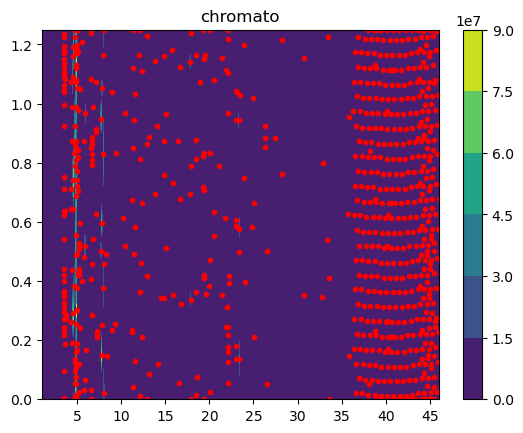

/home/camille/Documents/code/agouet/Python-2DGC-Alignment/src/plot.py:366: RuntimeWarning: divide by zero encountered in log
  chromato = np.log(chromato)


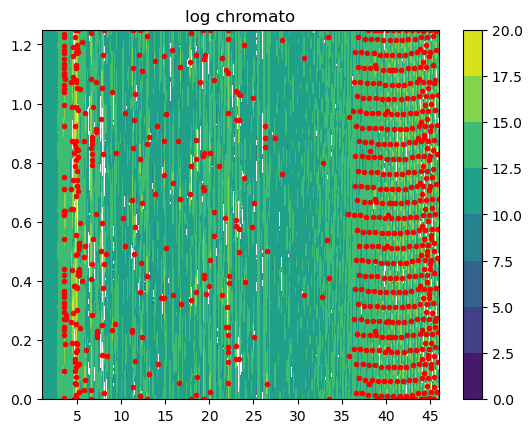

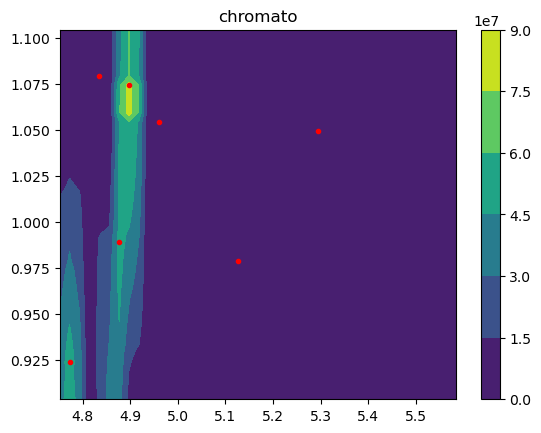

In [ ]:
# plot peaks
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato)
plot.visualizer((chromato, time_rn), title="log chromato", points=coordinates_in_chromato)
plot.visualizer((chromato, time_rn), title="chromato", log_chromato=False, points=coordinates_in_chromato, center_pt=[200,200], center_pt_window_1=20, center_pt_window_2=20)

In [34]:
import read_chroma 

# path='/media/camille/DATA1/cdf centroid/' #  afaire une path simple pour trouver mon dossier dimage
# file='A-F-028-817822-droite-ReCIVA.cdf'



HTML(value='<b>Choisissez vos parametres:</b>')

Text(value='/media/camille/DATA1/cdf centroid/', description='Path')

Text(value='', description='File')

FloatSlider(value=1.25, description='modulation time(mod_time):', max=2.0, step=0.01, style=SliderStyle(descri…

Button(description="Exécuter l'analyse", style=ButtonStyle())

Output()